In [9]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import cm as colormaps
import numpy as np
from scipy.signal import argrelextrema

np.set_printoptions(precision=5)

In [10]:
def f(x):
    x1, x2 = x
    return x1 ** 3 + x2 ** 3 - 3 * x1 * x2

In [11]:
x1_bounds = (-5, 5)
x2_bounds = (-5, 5)

x1 = np.arange(*x1_bounds, 5e-3)
x2 = np.arange(*x2_bounds, 5e-3)

In [12]:
def x0(bounds):
    # Используем середину в качестве начального приближения
    return sum(bounds) / len(bounds)

In [13]:
from scipy.optimize import minimize

min_info = minimize(fun=f, x0=(x0(x1_bounds), x0(x2_bounds)), bounds=(x1_bounds, x2_bounds))

print(f"min F(x)={min_info['fun']} в точке {min_info['x']}")

min F(x)=0.0 в точке [0. 0.]


In [14]:
def f_inv(x):
    return -f(x)

In [15]:
max_info = minimize(fun=f_inv, x0=(x0(x1_bounds), x0(x2_bounds)), bounds=(x1_bounds, x2_bounds))

print(f"max F(x)={-max_info['fun']:.5f} в точке {max_info['x']}")

max F(x)=0.00000 в точке [0. 0.]


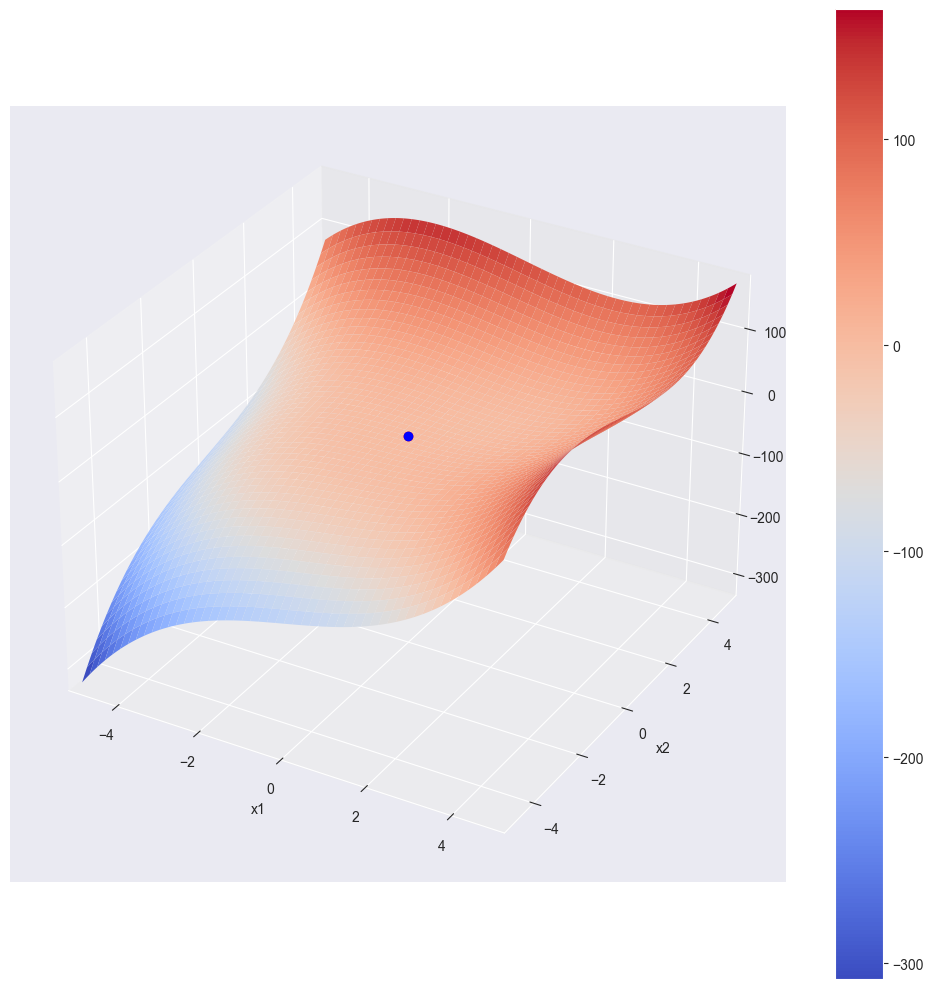

In [16]:
x = np.meshgrid(x1, x2)

min_x, max_x = min_info['x'], max_info['x']
min_point, max_point = (*min_x, f(min_x)), (*max_x, f(max_x))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 10))

surf = ax.plot_surface(*x, f(x), cmap=colormaps.coolwarm, linewidth=0)
ax.plot(*min_point, c='r', marker='o')
ax.plot(*max_point, c='b', marker='o')

ax.set_xlim(*x1_bounds)
ax.set_ylim(*x2_bounds)
plt.title()
plt.xlabel("x1")
plt.ylabel("x2")
plt.tight_layout()
fig.colorbar(surf)